In [74]:
import numpy as np
import time

## Generate list matrices

In [75]:
matrix_sizes = np.linspace(10, 500, 10, dtype=int)
matrices = {}
for size in matrix_sizes:
    matrices[size] = np.random.rand(size, size)

## Create 3 matrix multiplication functions in python, numpy and c++

In [76]:
def python_matmul(A, B):
    c = 0
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            for k in range(A.shape[1]):
                c += A[i][k] * B[k][j]

In [77]:
def numpy_matmul(A, B):
    A @ B

In [78]:
# Compile and run C++ code to implement matrix multiplication
!g++ -shared -o matmul.so -fPIC matmul.cpp
import ctypes

# Load the C++ shared library
cpp_lib = ctypes.CDLL('./matmul.so')


## Measure the execution time of each implementation for each matrix size

In [79]:
python_times = []
numpy_times = []
cpp_times = []

for size in matrix_sizes:
    A = matrices[size]
    B = matrices[size].copy()

    # The execution time in seconds for each implementation

    # For python
    start = time.time()
    python_matmul(A, B)
    end = time.time()
    python_times.append(end - start)

    # For numpy
    start = time.time()
    numpy_matmul(A, B)
    end = time.time()
    numpy_times.append(end - start)

    # For C++
    a_ptr = A.ctypes.data_as(ctypes.POINTER(ctypes.c_double))
    b_ptr = B.ctypes.data_as(ctypes.POINTER(ctypes.c_double))

    start = time.time()
    cpp_lib.cpp_matmul(a_ptr, b_ptr, ctypes.c_int(size))
    end = time.time()
    
    cpp_times.append(end - start)

print(python_times)
print(numpy_times)
print(cpp_times)

[0.0004782676696777344, 0.09812355041503906, 0.4933490753173828, 1.765470266342163, 3.8175876140594482, 7.363021373748779, 12.117865562438965, 20.098762035369873, 30.246760368347168, 46.89191389083862]
[7.510185241699219e-05, 0.00011396408081054688, 0.0007069110870361328, 0.0003552436828613281, 0.00037980079650878906, 0.0008089542388916016, 0.001241922378540039, 0.0017278194427490234, 0.002282381057739258, 0.0037267208099365234]
[0.0006308555603027344, 0.0014026165008544922, 0.009244918823242188, 0.028987884521484375, 0.06493258476257324, 0.12473893165588379, 0.20950698852539062, 0.32125186920166016, 0.47087955474853516, 0.7414944171905518]


## Plot the execution times for each implementation and matrix size

In [80]:
import matplotlib.pyplot as plt

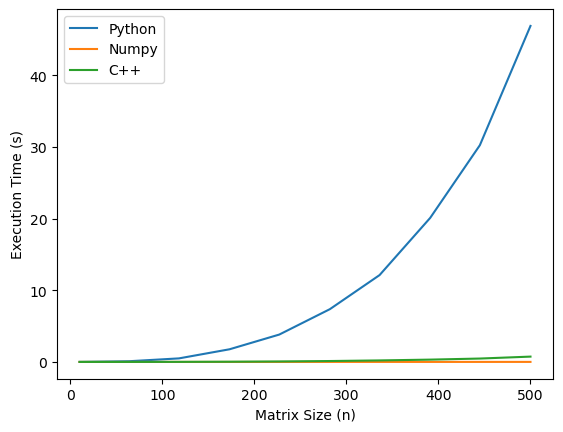

In [81]:
plt.plot(matrix_sizes, python_times, label='Python')
plt.plot(matrix_sizes, numpy_times, label='Numpy')
plt.plot(matrix_sizes, cpp_times, label='C++')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Execution Time (s)')
plt.legend()

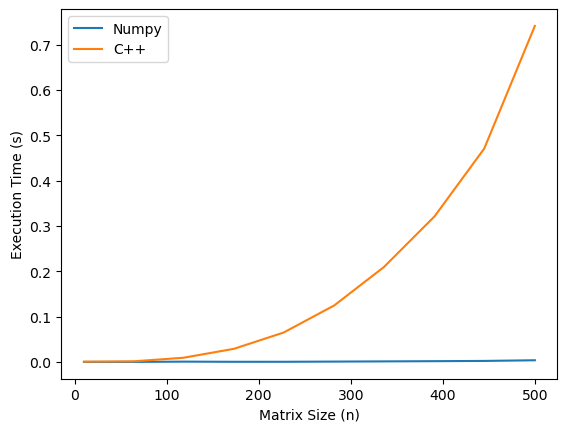

In [82]:
# Because the python code is too slow, I'll remove it from the plot to have a clarity comparison between the other two
plt.plot(matrix_sizes, numpy_times, label='Numpy')
plt.plot(matrix_sizes, cpp_times, label='C++')
plt.xlabel('Matrix Size (n)')
plt.ylabel('Execution Time (s)')
plt.legend()

### Conclusion: numpy is faster than C++ in this case because it uses vectorized operation and C++ just uses for loop. Python is too much slower.